In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from collections import OrderedDict
import matplotlib.colors as colors
import matplotlib.cm as cmx
import pickle

from astropy.cosmology import wCDM
from astropy.cosmology import FlatLambdaCDM, FlatwCDM

In [12]:
# get correct cosmology

h0 = 70
cosmo = wCDM(H0=h0, Om0=0.3, w0=-1, Ode0=0.7)
cosmo1 = wCDM(H0=h0, Om0=0.3, w0=-2, Ode0=0.7)
cosmo2 = wCDM(H0=h0, Om0=0.3, w0=0, Ode0=0.7)


xaxis = np.arange(0.001,1.5,0.01)
theor_dist = np.array([cosmo.distmod(z).value for z in xaxis])
theor_dist1 = np.array([cosmo1.distmod(z).value for z in xaxis])
theor_dist2 = np.array([cosmo2.distmod(z).value for z in xaxis])

In [3]:
# read SALT2mu results
cases_ddf = ['perfect3000', 'random3000', 'fiducial3000', '99SNIa1SNII', '99SNIa1SNIbc', '99SNIa1SNIax']

v = '7'

data_ddf = {}

for name in cases_ddf:
    fname = '/media/RESSPECT/data/PLAsTiCC/for_metrics/final_data3/DDF/results/v' + v + '/3000/fitres/'+ \
            'test_salt2mu_lowz_withbias_' + name + '.fitres'

    data_temp = pd.read_csv(fname, delim_whitespace=True, comment='#')
    
    if 'perfect' not in name:
        fitres_temp = pd.read_csv(fname, delim_whitespace=True, comment='#')
        print(name, ' fitres_temp.size = ', fitres_temp.shape[0])
        
        # 11 are Ia and 1 are lowz, different sims
        mask = np.logical_and(fitres_temp['SIM_TYPE_INDEX'].values != 11,
                              fitres_temp['SIM_TYPE_INDEX'].values != 1)
        print(name, ' mask.size = ', sum(mask))
        fitres_temp3 = fitres_temp[mask]

        # remove duplicated redshift
        z_all = []
        for j in range(fitres_temp3.shape[0]):
    
            z = fitres_temp3.iloc[j]['SIM_ZCMB']
            z_new = z
            if z in z_all:
                while z_new in z_all:
                    z_new = z + np.random.normal(loc=0, scale=0.001)
            
            fitres_temp3.loc[j, 'SIM_ZCMB'] = z_new
            z_all.append(z_new)
        
        indx = np.argsort(z_all)
        fitres_temp2 = fitres_temp3[['SIM_ZCMB', 'MU', 'MUERR', 'MURES']].iloc[indx]
        data_ddf[name] = fitres_temp2
        print(name, data_ddf[name].shape[0])
    else:
        data_ddf[name] = data_temp
        print(name, data_ddf[name].shape[0])

perfect3000 3145
random3000  fitres_temp.size =  3141
random3000  mask.size =  453


/media/emille/git/COIN/RESSPECT_repo/venv/resspect_main/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


random3000 453
fiducial3000  fitres_temp.size =  3147
fiducial3000  mask.size =  109
fiducial3000 109
99SNIa1SNII  fitres_temp.size =  3140
99SNIa1SNII  mask.size =  30
99SNIa1SNII 30
99SNIa1SNIbc  fitres_temp.size =  3144
99SNIa1SNIbc  mask.size =  30
99SNIa1SNIbc 30
99SNIa1SNIax  fitres_temp.size =  3142
99SNIa1SNIax  mask.size =  30
99SNIa1SNIax 30


In [4]:
all_shapes = {'SLSN': 'o',
              'SNIax': 's',
              'SNII': 'd',
              'SNIbc': 'X',
              'AGN': '^',
              'CART': 'v',
              'perfect': 'P',
              'fiducial': 'p',
              'random': 'H' }

def make_remap_dict(file_extension):
    if 'wfd' == file_extension:
        remap_dict = OrderedDict({
                              'perfect3000': 'Perfect', 
                              'fiducial3000': 'Fiducial', 
                              'random3000': 'Random',
                              '75SNIa25SNII': 'SN-II 25 %', 
                              '90SNIa10SNII': 'SN-II 10 %',
                              '95SNIa5SNII': 'SN-II 5 %',
                              '98SNIa2SNII': 'SN-II 2 %',
                              '99SNIa1SNII': 'SN-II 1 %',
                              '90SNIa10SNIbc': 'SN-Ibc 10 %' ,
                              '95SNIa5SNIbc': 'SN-Ibc 5 %',
                              '98SNIa2SNIbc': 'SN-Ibc 2 %',
                              '99SNIa1SNIbc': 'SN-Ibc 1 %',
                              '75SNIa25SNIax': 'SN-Iax 25 %',
                              '90SNIa10SNIax': 'SN-Iax 10 %',
                              '95SNIa5SNIax': 'SN-Iax 5 %',
                              '98SNIa2SNIax': 'SN-Iax 2 %',
                              '99SNIa1SNIax': 'SN-Iax 1 %',
                              '98SNIa2CART': 'CART 2 %',
                              '99SNIa1CART': 'CART 1 %',
                              '98SNIa2SLSN': 'SLSN 2 %',
                              '99SNIa1SLSN': 'SLSN 1 %'
                  })
    else:
        remap_dict = OrderedDict({
                          'perfect3000': 'Perfect', 
                          'fiducial3000': 'Fiducial', 
                          'random3000': 'Random',
                          '90SNIa10SNII': 'SN-II 10 %',
                          '95SNIa5SNII': 'SN-II 5 %',
                          '98SNIa2SNII': 'SN-II 2 %',
                          '99SNIa1SNII': 'SN-II 1 %',
                          '95SNIa5SNIbc': 'SN-Ibc 5 %',
                          '98SNIa2SNIbc': 'SN-Ibc 2 %',
                          '99SNIa1SNIbc': 'SN-Ibc 1 %',
                          '90SNIa10SNIax': 'SN-Iax 10 %',
                          '95SNIa5SNIax': 'SN-Iax 5 %',
                          '98SNIa2SNIax': 'SN-Iax 2 %',
                          '99SNIa1SNIax': 'SN-Iax 1 %'
              })
    return(remap_dict)

In [5]:
remap_dict_ddf = make_remap_dict('ddf')
remap_dict_wfd = make_remap_dict('wfd')

In [6]:
# read SALT2mu results
cases_wfd = ['perfect3000', 'random3000', 'fiducial3000', '99SNIa1SNII', '99SNIa1SNIbc', 
         '99SNIa1SNIax', '99SNIa1CART', '99SNIa1SLSN']

data_wfd = {}

v2 = '5'

for name in cases_wfd:
    fname = '/media/RESSPECT/data/PLAsTiCC/for_metrics/final_data3/WFD/results/v' + v2 + '/3000/fitres/'+ \
            'test_salt2mu_lowz_withbias_' + name + '.fitres'

    data_temp = pd.read_csv(fname, delim_whitespace=True, comment='#')
    
    if 'perfect' not in name:
        fitres_temp = pd.read_csv(fname, delim_whitespace=True, comment='#')
        
        # 11 are Ia and 1 are lowz, different sims
        mask = np.logical_and(fitres_temp['SIM_TYPE_INDEX'].values != 11,
                              fitres_temp['SIM_TYPE_INDEX'].values != 1)
        fitres_temp3 = fitres_temp[mask]

        # remove duplicated redshift
        z_all = []
        for j in range(fitres_temp3.shape[0]):
    
            z = fitres_temp3.iloc[j]['SIM_ZCMB']
            z_new = z
            if z in z_all:
                while z_new in z_all:
                    z_new = z + np.random.normal(loc=0, scale=0.001)
            
            fitres_temp3.at[j, 'SIM_ZCMB'] = z_new
            z_all.append(z_new)
        
        indx = np.argsort(z_all)
        fitres_temp2 = fitres_temp3[['SIM_ZCMB', 'MU', 'MUERR','MURES']].iloc[indx]
        data_wfd[name] = fitres_temp2
        print(name, data_wfd[name].shape[0])
    else:
        data_wfd[name] = data_temp
        print(name, data_wfd[name].shape[0])


perfect3000 3147


/media/emille/git/COIN/RESSPECT_repo/venv/resspect_main/lib/python3.7/site-packages/pandas/core/frame.py:3834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[index, col] = value


random3000 284
fiducial3000 44
99SNIa1SNII 30
99SNIa1SNIbc 30
99SNIa1SNIax 30
99SNIa1CART 30
99SNIa1SLSN 10


In [7]:
# Color map
rainbow = cm = plt.get_cmap('plasma_r')
cNorm  = colors.LogNorm(vmin=1, vmax=52) #colors.Normalize(vmin=0, vmax=50)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=rainbow)
color_map = scalarMap.to_rgba(np.arange(1, 52))

In [8]:
a_file = open("colors.pkl", "rb")

contaminant_colors = pickle.load(a_file)

In [9]:
name_color = {}
name_color['SN-II'] = 'Greys'
name_color['SN-Iax'] = 'Purples'
name_color['SN-Ibc'] = 'Oranges'
name_color['SLSN'] = 'Greens'
name_color['AGN'] = 'spring'
name_color['CART'] = 'summer'

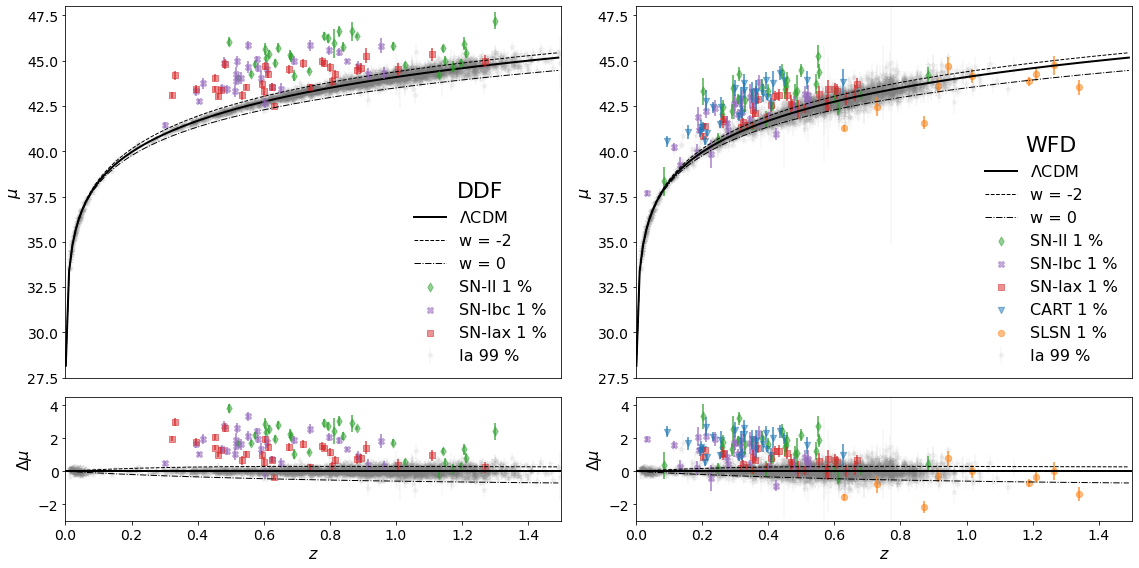

In [39]:
fig, axs = plt.subplots(2,2,figsize=(16,8), gridspec_kw={'height_ratios': [3, 1]})


for i in [0,1]:
    axs[1][i].set_ylabel(r'$\Delta \mu$', fontsize=16)
    axs[1][i].set_xlabel(r'$z$', fontsize=16)
    
    axs[0][i].set_ylabel(r'$\mu$', fontsize=16)
    axs[0][i].set_xticks([])
    
    axs[1][i].set_xlim(0, 1.5)
    axs[1][i].set_xticks(np.arange(0,1.5,0.2))
    axs[1][i].set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4], fontsize=14)
    
    if i == 0:
        axs[0][i].plot(xaxis, theor_dist, lw=2, color='black', label=r'$\Lambda$CDM', zorder=2)
        axs[0][i].plot(xaxis, theor_dist1, lw=1, ls='dashed', color='black', label='w = -2', zorder=3)
        axs[0][i].plot(xaxis, theor_dist2, lw=1, ls='dashdot', color='black', label='w = 0', zorder=4)
        axs[0][i].errorbar(data_ddf['perfect3000']['SIM_ZCMB'], data_ddf['perfect3000']['MU'],
             yerr=data_ddf['perfect3000']['MUERR'], fmt ='*', color='gray', alpha=0.075,
             label='Ia 99 %', zorder=1)
        
        axs[1][i].errorbar(data_ddf['perfect3000']['SIM_ZCMB'], 
              data_ddf['perfect3000']['MU'] - cosmo.distmod(data_ddf['perfect3000']['SIM_ZCMB']).value,
             yerr=data_ddf['perfect3000']['MUERR'], fmt ='*', color='gray', alpha=0.075,
             label='Ia 99 %', zorder=1)

        for k in range(3, len(cases_ddf)):
            for key in all_shapes:
                if key in cases_ddf[k]:
                    cont = key       
           
            axs[0][i].scatter(data_ddf[cases_ddf[k]]['SIM_ZCMB'], data_ddf[cases_ddf[k]]['MU'],
                marker=all_shapes[cont], s=40, 
                 color=contaminant_colors['ddf'][cases_ddf[k]], label=remap_dict_ddf[cases_ddf[k]], alpha=0.5, zorder=3)
    
            axs[0][i].errorbar(data_ddf[cases_ddf[k]]['SIM_ZCMB'], data_ddf[cases_ddf[k]]['MU'], 
                 yerr=data_ddf[cases_ddf[k]]['MUERR'], fmt=' ',
                 color=contaminant_colors['ddf'][cases_ddf[k]],  alpha=0.85,zorder=3)
    
            axs[1][i].scatter(data_ddf[cases_ddf[k]]['SIM_ZCMB'], 
                              data_ddf[cases_ddf[k]]['MU'] - cosmo.distmod(data_ddf[cases_ddf[k]]['SIM_ZCMB']).value,
                              marker=all_shapes[cont], s=40, 
                              color=contaminant_colors['ddf'][cases_ddf[k]], label=remap_dict_ddf[cases_ddf[k]], alpha=0.5)
    
            axs[1][i].errorbar(data_ddf[cases_ddf[k]]['SIM_ZCMB'], 
                               data_ddf[cases_ddf[k]]['MU'] - cosmo.distmod(data_ddf[cases_ddf[k]]['SIM_ZCMB']).value, 
                               yerr=data_ddf[cases_ddf[k]]['MUERR'], fmt=' ',
                               color=contaminant_colors['ddf'][cases_ddf[k]],  alpha=0.85)
        axs[0][i].legend(loc='lower right', title='DDF', frameon=False, fontsize=16)
        
    else:    
        axs[0][i].errorbar(data_wfd['perfect3000']['SIM_ZCMB'], data_wfd['perfect3000']['MU'],
                           yerr=data_wfd['perfect3000']['MUERR'], fmt ='*', color='gray', alpha=0.075,
                           label='Ia 99 %', zorder=1)
        
        axs[1][i].errorbar(data_wfd['perfect3000']['SIM_ZCMB'], 
                           data_wfd['perfect3000']['MU'] - cosmo.distmod(data_wfd['perfect3000']['SIM_ZCMB']).value,
                           yerr=data_wfd['perfect3000']['MUERR'], fmt ='*', color='gray', alpha=0.075,
                           label='Ia 99 %', zorder=1)

        for k in range(3, len(cases_wfd)):            
            for key in all_shapes:
                if key in cases_wfd[k]:
                    cont = key
            
            axs[0][i].scatter(data_wfd[cases_wfd[k]]['SIM_ZCMB'], data_wfd[cases_wfd[k]]['MU'],
                              marker=all_shapes[cont], s=40, 
                              color=contaminant_colors['wfd'][cases_wfd[k]], label=remap_dict_wfd[cases_wfd[k]], alpha=0.5)
    
            axs[0][i].errorbar(data_wfd[cases_wfd[k]]['SIM_ZCMB'], data_wfd[cases_wfd[k]]['MU'], 
                               yerr=data_wfd[cases_wfd[k]]['MUERR'], fmt=' ',
                               color=contaminant_colors['wfd'][cases_wfd[k]],  alpha=0.85)
        
            axs[1][i].scatter(data_wfd[cases_wfd[k]]['SIM_ZCMB'], 
                         data_wfd[cases_wfd[k]]['MU'] - cosmo.distmod(data_wfd[cases_wfd[k]]['SIM_ZCMB']).value,
                         marker=all_shapes[cont], s=40, 
                         color=contaminant_colors['wfd'][cases_wfd[k]], label=remap_dict_wfd[cases_wfd[i]], alpha=0.5)
    
            axs[1][i].errorbar(data_wfd[cases_wfd[k]]['SIM_ZCMB'], 
                          data_wfd[cases_wfd[k]]['MU'] - cosmo.distmod(data_wfd[cases_wfd[k]]['SIM_ZCMB']).value, 
                          yerr=data_wfd[cases_wfd[k]]['MUERR'], fmt=' ',
                          color=contaminant_colors['wfd'][cases_wfd[k]],  alpha=0.85)
        
        axs[0][i].plot(xaxis, theor_dist, lw=2, color='black', label=r'$\Lambda$CDM', zorder=2)
        axs[0][i].plot(xaxis, theor_dist1, lw=1, ls='dashed', color='black', label='w = -2', zorder=3)
        axs[0][i].plot(xaxis, theor_dist2, lw=1, ls='dashdot', color='black', label='w = 0', zorder=4)
        axs[0][i].legend(loc='lower right', title='WFD', frameon=False, fontsize=16)
    
    
    axs[1][i].plot([0, 1.5], [0,0], lw=2, color='black')
    axs[1][i].plot(xaxis, theor_dist1 - theor_dist, lw=1, ls='dashed', color='black')
    axs[1][i].plot(xaxis, theor_dist2 - theor_dist, lw=1, ls='dashdot', color='black')
    plt.setp(axs[0][i].get_legend().get_title(), fontsize=22)
    
    for j in range(2):
        axs[i][j].set_xlim(0, 1.5)

axs[0][0].set_ylim(27.5, 48)
axs[0][1].set_ylim(27.5, 48)
axs[1][0].set_ylim(-3,4.5)
axs[1][1].set_ylim(-3,4.5)

axs[0][0].set_yticklabels([27.5, 30.0, 32.5, 35.0, 37.5, 40.0, 42.5, 45.0, 47.5], fontsize=14)
axs[0][1].set_yticklabels([27.5, 30.0, 32.5, 35.0, 37.5, 40.0, 42.5, 45.0, 47.5], fontsize=14)
axs[1][0].tick_params(axis='both', labelsize=14)
axs[1][1].tick_params(axis='both', labelsize=14)

plt.subplots_adjust(hspace=0)
plt.tight_layout()
plt.savefig('hubble_v' + v + '.pdf')
#plt.show()